<a href="https://colab.research.google.com/github/hiyoman/ai/blob/main/BlackIceClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 사전등록
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import csv
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [2]:
# 데이터 불러오기 및 정보확인
#data = pd.read_csv('black_ice.csv', thousands = ',', encoding='cp949')
#data = pd.read_csv('black_ice_processed.csv', thousands = ',', encoding='cp949')
#data = pd.read_csv('중앙선_죽령터널(노면온도).csv', thousands = ',', encoding='cp949')
data = pd.read_csv('중앙선_죽령터널(노면온도)_rm_NAN.csv', thousands = ',', encoding='cp949')

FileNotFoundError: ignored

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   노선          3253 non-null   object 
 1   위치          3253 non-null   int64  
 2   수집일시        3253 non-null   object 
 3   노면온도        3253 non-null   float64
 4   대기온도        3253 non-null   float64
 5   노면대기_온도차    3253 non-null   float64
 6   습도          3253 non-null   float64
 7   기압          3253 non-null   float64
 8   풍속          3253 non-null   float64
 9   시간강수량       3253 non-null   float64
 10  6시간누적강수량    3253 non-null   float64
 11  노면상태        3253 non-null   object 
 12  도로살얼음실시간경보  3253 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 330.5+ KB


,노선,위치,수집일시,노면온도,대기온도,노면대기_온도차,습도,기압,풍속,시간강수량,6시간누적강수량,노면상태,도로살얼음실시간경보
0,중앙선,238,2020-11-13 11:00,14.98761,9.8,5.18761,42.4,981.7,2.0,0.0,0.0,Smp,관찰
1,중앙선,238,2020-11-13 12:00,19.23038,13.0,6.23038,43.0,981.0,2.7,0.0,0.0,Dry,관찰
2,중앙선,238,2020-11-13 13:00,22.17194,13.8,8.37194,44.2,980.2,2.4,0.0,0.0,Dry,관찰
3,중앙선,238,2020-11-13 14:00,23.22433,14.4,8.82433,42.3,979.8,2.8,0.0,0.0,Dry,관찰
4,중앙선,238,2020-11-13 15:00,22.16589,14.6,7.56589,43.9,979.5,1.3,0.0,0.0,Dry,관찰


In [ ]:
def get_date_and_time(text, flag):
    text = str(text)
    text = text.rstrip()
    text = text.lstrip()
    my_text = text.split(' ')
    
    if flag == 0:
        return my_text[0]
    else:
        return my_text[1]

In [ ]:
data['date'] = data['수집일시'].apply(lambda x : get_date_and_time(x, 0))
data['time'] = data['수집일시'].apply(lambda x : get_date_and_time(x, 1))

In [ ]:
def get_surface_state(text):
    text = str(text)
    text = text.rstrip()
    text = text.lstrip()
    
    if text == "Smp":
        return "no"
    elif text == "Dry":
        return "no"
    elif text == "Damp":
        return "no"
    elif text == "Critically wet":
        return "no"
    elif text == "Chemically wet":
        return "yes"
    elif text == "Snow":
        return "yes"
    elif text == "Snow_Ice":
        return "yes"
    elif text == "Ice":
        return "yes"
    else:
        return "no"

In [ ]:
data['노면상태분류'] = data['노면상태'].apply(lambda x : get_surface_state(x))

In [ ]:
data['도로살얼음실시간경보'] = data['도로살얼음실시간경보'].fillna('관찰')
#data['BIPA_사전경보'] = data['BIPA_사전경보'].fillna('관찰')
#data['제설작업횟수'] = data['제설작업횟수'].fillna(0)
#data['제설작업횟수'].head()

In [ ]:
cnt_per_alarm = data['도로살얼음실시간경보'].value_counts()
print(cnt_per_alarm)

관찰    2920
경계     310
주의      23
Name: 도로살얼음실시간경보, dtype: int64


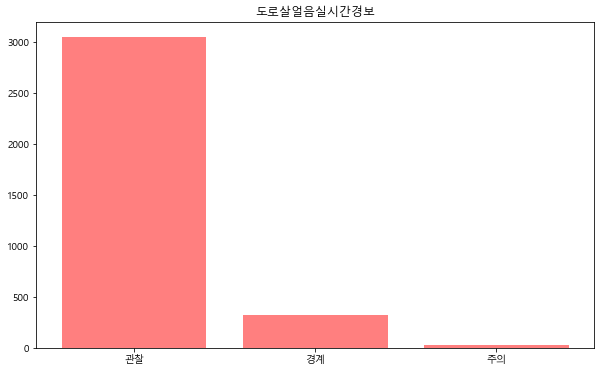

In [ ]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

label = ['관찰', '경계', '주의']
value = [3050, 318, 23]
index = [0, 1, 2]
plt.rcParams['figure.figsize'] = [10, 6]
plt.bar(index, value, color='red', alpha=0.5)
plt.title('도로살얼음실시간경보')
plt.xticks(index, label)
plt.show()

In [ ]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   노선          3254 non-null   object 
 1   위치          3254 non-null   int64  
 2   수집일시        3254 non-null   object 
 3   노면온도        3254 non-null   float64
 4   대기온도        3254 non-null   float64
 5   습도          3254 non-null   float64
 6   기압          3254 non-null   float64
 7   풍속          3254 non-null   float64
 8   시간강수량       3254 non-null   float64
 9   6시간누적강수량    3253 non-null   float64
 10  노면상태        3254 non-null   object 
 11  도로살얼음실시간경보  3254 non-null   object 
 12  date        3254 non-null   object 
 13  time        3254 non-null   object 
 14  노면상태분류      3254 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 381.5+ KB


,노선,위치,수집일시,노면온도,대기온도,습도,기압,풍속,시간강수량,6시간누적강수량,노면상태,도로살얼음실시간경보,date,time,노면상태분류
0,중앙선,238,2020-11-13 11:00,14.98761,9.8,42.4,981.7,2.0,0.0,0.0,Smp,관찰,2020-11-13,11:00,no
1,중앙선,238,2020-11-13 12:00,19.23038,13.0,43.0,981.0,2.7,0.0,0.0,Dry,관찰,2020-11-13,12:00,no
2,중앙선,238,2020-11-13 13:00,22.17194,13.8,44.2,980.2,2.4,0.0,0.0,Dry,관찰,2020-11-13,13:00,no
3,중앙선,238,2020-11-13 14:00,23.22433,14.4,42.3,979.8,2.8,0.0,0.0,Dry,관찰,2020-11-13,14:00,no
4,중앙선,238,2020-11-13 15:00,22.16589,14.6,43.9,979.5,1.3,0.0,0.0,Dry,관찰,2020-11-13,15:00,no


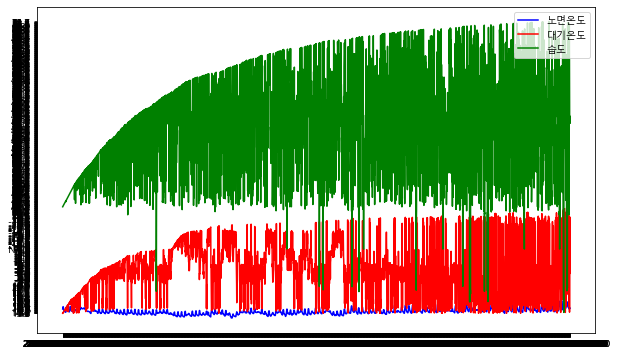

In [ ]:
x = data['수집일시']
y1 = data['노면온도']
y2 = data['대기온도']
y3 = data['습도']

plt.plot(x, y1, 'b', label = '노면온도')
plt.plot(x, y2, 'r', label = '대기온도')
plt.plot(x, y3, 'g', label = '습도')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
data_ = data[data.date == "2021-02-09"]
cnt_per_alarm = data_['도로살얼음실시간경보'].value_counts()
#print(cnt_per_alarm)
data_.head(30)

,노선,위치,수집일시,노면온도,대기온도,습도,기압,풍속,시간강수량,6시간누적강수량,노면상태,도로살얼음실시간경보,date,time
1629,중앙선,238,2021-02-09 0:00,-4.526347,-6.9,43.8,978.7,1.7,0,0,Dry,관찰,2021-02-09,0:00
1630,중앙선,238,2021-02-09 1:00,-4.949889,-7.1,45.6,979,1.5,0,0,Dry,관찰,2021-02-09,1:00
1631,중앙선,238,2021-02-09 2:00,-5.270833,-7.3,46.3,979.2,1.7,0,0,Dry,관찰,2021-02-09,2:00
1632,중앙선,238,2021-02-09 3:00,-5.360443,-7.4,46.4,979.3,2.6,0,0,Dry,관찰,2021-02-09,3:00
1633,중앙선,238,2021-02-09 4:00,-6.177257,-7.9,48.2,979.2,2.3,0,0,Dry,관찰,2021-02-09,4:00
1634,중앙선,238,2021-02-09 5:00,-6.436983,-8.4,49.9,979.1,1.2,0,0,Dry,관찰,2021-02-09,5:00
1635,중앙선,238,2021-02-09 6:00,-6.962651,-8.9,51.8,979.1,1.4,0,0,Dry,관찰,2021-02-09,6:00
1636,중앙선,238,2021-02-09 7:00,-7.327530,-9,52.2,979,1.6,0,0,Dry,관찰,2021-02-09,7:00
1637,중앙선,238,2021-02-09 8:00,-7.004264,-8.4,47.9,979.5,2.1,0,0,Dry,관찰,2021-02-09,8:00
1638,중앙선,238,2021-02-09 9:00,-4.711810,-6.9,40.7,979.6,2.6,0,0,Dry,관찰,2021-02-09,9:00


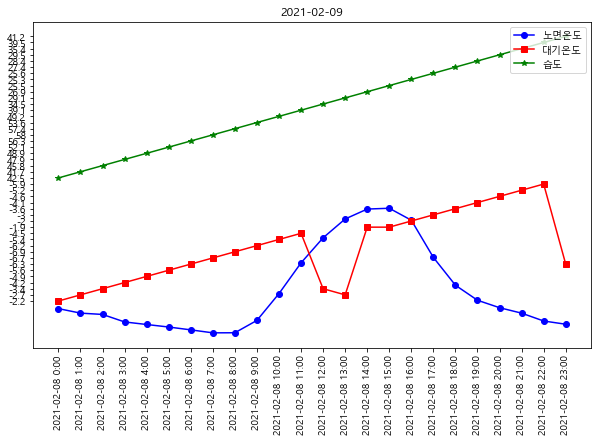

In [ ]:
x = data_['수집일시']
y1 = data_['노면온도']
y2 = data_['대기온도']
y3 = data_['습도']

plt.plot(x, y1, 'b', label = '노면온도', marker = 'o')
plt.plot(x, y2, 'r', label = '대기온도', marker = 's')
plt.plot(x, y3, 'g', label = '습도', marker = '*')

#plt.axvline(x = 0, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 1, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 2, ymin = 0.01, ymax = 0.99, color = 'y', linestyle = '--')
#plt.axvline(x = 3, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 4, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 5, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 6, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 7, ymin = 0.01, ymax = 0.99, color = 'y', linestyle = '--')
#plt.axvline(x = 8, ymin = 0.01, ymax = 0.99, color = 'y', linestyle = '--')
#plt.axvline(x = 9, ymin = 0.01, ymax = 0.99, color = 'y', linestyle = '--')
#plt.axvline(x = 10, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 11, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 12, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 13, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 14, ymin = 0.01, ymax = 0.99, color = 'y', linestyle = '--')
#plt.axvline(x = 15, ymin = 0.01, ymax = 0.99, color = 'y', linestyle = '--')
#plt.axvline(x = 16, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 17, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 18, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 20, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 21, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 22, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')
#plt.axvline(x = 23, ymin = 0.01, ymax = 0.99, color = 'k', linestyle = '--')

#plt.axvline(x = 0.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 1.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 2.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 3.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 4.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 5.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 6.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 7.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 8.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 9.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 10.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 11.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 12.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 13.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 14.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 15.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 16.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 17.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 18.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 19.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 20.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 21.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 22.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')
#plt.axvline(x = 23.3, ymin = 0.01, ymax = 0.99, color = 'm', linestyle = '-.')

plt.xticks(rotation = 90)
plt.title('2021-02-09')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   노선          3253 non-null   object 
 1   위치          3253 non-null   int64  
 2   수집일시        3253 non-null   object 
 3   노면온도        3253 non-null   float64
 4   대기온도        3253 non-null   float64
 5   노면대기_온도차    3253 non-null   float64
 6   습도          3253 non-null   float64
 7   기압          3253 non-null   float64
 8   풍속          3253 non-null   float64
 9   시간강수량       3253 non-null   float64
 10  6시간누적강수량    3253 non-null   float64
 11  노면상태        3253 non-null   object 
 12  도로살얼음실시간경보  3253 non-null   object 
 13  date        3253 non-null   object 
 14  time        3253 non-null   object 
 15  노면상태분류      3253 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 406.8+ KB


,노선,위치,수집일시,노면온도,대기온도,노면대기_온도차,습도,기압,풍속,시간강수량,6시간누적강수량,노면상태,도로살얼음실시간경보,date,time,노면상태분류
0,중앙선,238,2020-11-13 11:00,14.98761,9.8,5.18761,42.4,981.7,2.0,0.0,0.0,Smp,관찰,2020-11-13,11:00,no
1,중앙선,238,2020-11-13 12:00,19.23038,13.0,6.23038,43.0,981.0,2.7,0.0,0.0,Dry,관찰,2020-11-13,12:00,no
2,중앙선,238,2020-11-13 13:00,22.17194,13.8,8.37194,44.2,980.2,2.4,0.0,0.0,Dry,관찰,2020-11-13,13:00,no
3,중앙선,238,2020-11-13 14:00,23.22433,14.4,8.82433,42.3,979.8,2.8,0.0,0.0,Dry,관찰,2020-11-13,14:00,no
4,중앙선,238,2020-11-13 15:00,22.16589,14.6,7.56589,43.9,979.5,1.3,0.0,0.0,Dry,관찰,2020-11-13,15:00,no


In [ ]:
x = data.iloc[:, 3:11]
y = data.iloc[:, 15]     # 목표변수(위험운전행동등급)

In [ ]:
# 분포확인
x.info()
y.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   노면온도      3253 non-null   float64
 1   대기온도      3253 non-null   float64
 2   노면대기_온도차  3253 non-null   float64
 3   습도        3253 non-null   float64
 4   기압        3253 non-null   float64
 5   풍속        3253 non-null   float64
 6   시간강수량     3253 non-null   float64
 7   6시간누적강수량  3253 non-null   float64
dtypes: float64(8)
memory usage: 203.4 KB


no     2993
yes     260
Name: 노면상태분류, dtype: int64

In [ ]:
# 데이터셋 나누고 레이블 분포확인
x_train, x_test, y_tain, y_test = train_test_split(x, y, test_size=0.40)
print(Counter(y_tain))
print(Counter(y_test))

Counter({'no': 1805, 'yes': 146})
Counter({'no': 1188, 'yes': 114})


In [ ]:
# 의사결정트리만들기
model = DecisionTreeClassifier(criterion='entropy', max_depth = 7)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 모델학습
model.fit(x_train, y_tain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 예측: 테스트데이터 대상 레이블
y_pred = model.predict(x_test)

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.945


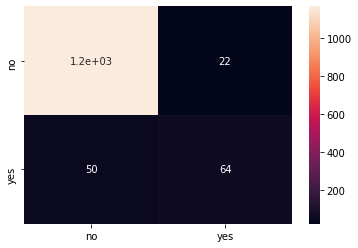

In [ ]:
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)
sns.heatmap(matrix, annot=True)

In [ ]:
# 시각화 설정
dot_data = export_graphviz(model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=model.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True)

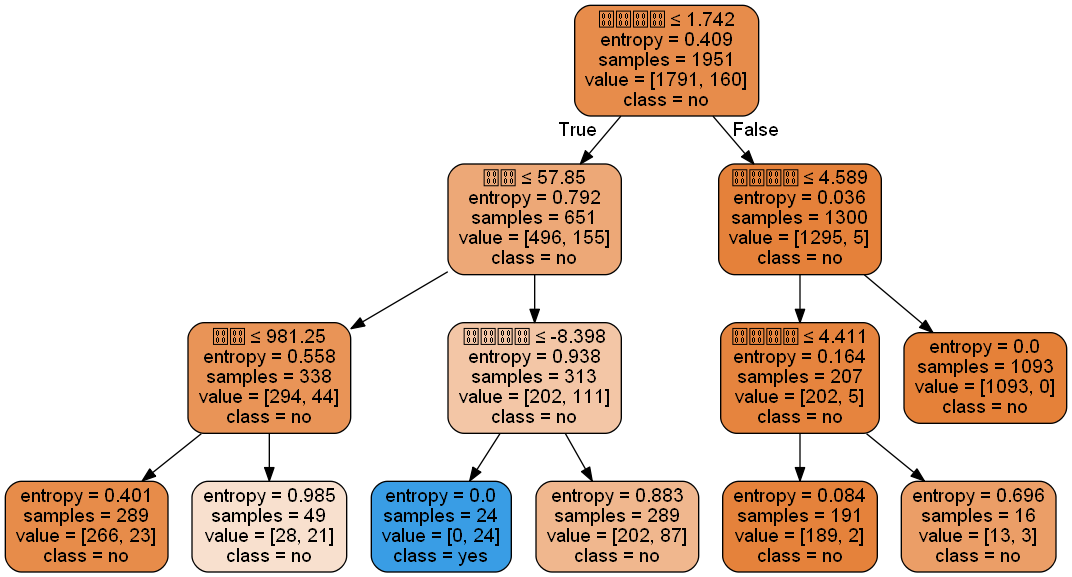

In [ ]:
# 그래프
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# 중요도확인: 입력변수 대상
model.feature_importances_
df_importance = pd.DataFrame({'feature' : x_train.columns, 'importance' : model.feature_importances_})
df_importance

,feature,importance
0,노면온도,0.835890
1,대기온도,0.000000
2,노면대기_온도차,0.000000
3,습도,0.094535
4,기압,0.069575
5,풍속,0.000000
6,시간강수량,0.000000
7,6시간누적강수량,0.000000
